# Building a Boosting Algorithm from Scratch and Comparing with scikit-learn

## Introduction

In this notebook, we build a simple boosting algorithm step by step using decision stumps (small decision trees with depth 1).

Boosting is an ensemble method. It works by training new models on the errors (residuals) of previous models. Over time, the predictions get better.

Here’s what we do in this notebook:

- Build a boosting model manually with 3 steps,
- Use `DecisionTreeRegressor` with `max_depth=1` as the weak learner,
- Use a fixed learning rate to scale each step’s prediction,
- Add all predictions together to get the final result,
- Compare our results with `GradientBoostingRegressor` from scikit-learn,
- See that both methods give the same predictions.

This is a good way to really understand how boosting works behind the scenes.

## Dataset
- 20 random (X, Y) pairs
- Y is the target, X is the only feature

In [1]:
import pandas as pd
import numpy as np

# Data
random_data = {
    'X': [3.75, 9.51, 7.32, 5.99, 1.56, 1.56, 0.58, 8.66, 6.01, 7.08,
          0.21, 9.70, 8.32, 2.12, 1.82, 1.83, 3.04, 5.25, 4.32, 2.91],
    'Y': [16.21, 36.15, 27.14, 22.14, 14.61, 11.23, 8.88, 30.14, 23.94, 28.46,
          5.32, 36.85, 30.77, 12.79, 11.25, 16.21, 16.10, 20.63, 21.60, 13.30]
}

df = pd.DataFrame(random_data)
df

,X,Y
0,3.75,16.21
1,9.51,36.15
2,7.32,27.14
3,5.99,22.14
4,1.56,14.61
5,1.56,11.23
6,0.58,8.88
7,8.66,30.14
8,6.01,23.94
9,7.08,28.46


## Step 1: Start with the Mean of Y

We set a learning rate and use the average of the target `Y` as the first prediction for all rows.

Then we calculate the difference between the actual `Y` values and this mean. This difference is called the first residual.

In [2]:
X = df[["X"]]
y = df["Y"]
learning_rate = 0.1

y_mean = y.mean()
df["initial_prediction"] = y_mean
df["residual1"] = y - y_mean

## Step 2: Train First Weak Learner

We train the first weak learner using the first residuals as the new target.

We use a decision tree with `max_depth=1`, also called a decision stump.

In [3]:
from sklearn.tree import DecisionTreeRegressor

In [4]:
X = df[["X"]]
y = df["residual1"]

model1 = DecisionTreeRegressor(max_depth=1)
model1.fit(X, df["residual1"])

DecisionTreeRegressor(max_depth=1)

## Step 3: Visualize the First Tree

We plot the first decision stump to see how it splits the data.

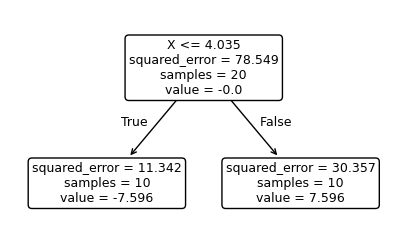

In [5]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(5,3))
plot_tree(model1, feature_names=["X"], rounded=True, fontsize = 9)
plt.show()

## Step 4: Predict and Scale

We make predictions using the first weak learner.

Then we multiply the predictions by the learning rate to reduce their effect.

In [6]:
df["y_pred1"] = model1.predict(X)
df["y_pred1 x learning_rate"] = df["y_pred1"] * learning_rate
df

,X,Y,initial_prediction,residual1,y_pred1,y_pred1 x learning_rate
0,3.75,16.21,20.186,-3.976,-7.596,-0.7596
1,9.51,36.15,20.186,15.964,7.596,0.7596
2,7.32,27.14,20.186,6.954,7.596,0.7596
3,5.99,22.14,20.186,1.954,7.596,0.7596
4,1.56,14.61,20.186,-5.576,-7.596,-0.7596
5,1.56,11.23,20.186,-8.956,-7.596,-0.7596
6,0.58,8.88,20.186,-11.306,-7.596,-0.7596
7,8.66,30.14,20.186,9.954,7.596,0.7596
8,6.01,23.94,20.186,3.754,7.596,0.7596
9,7.08,28.46,20.186,8.274,7.596,0.7596


## Step 5: Second Weak Learner on New Residuals

We calculate the new residuals by subtracting the scaled predictions from the first step.

Then we train the second weak learner on these new residuals and visualize the new tree.

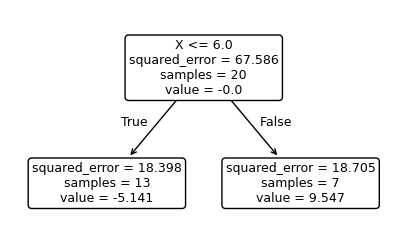

In [7]:
df["residual2"] = df["residual1"] - df["y_pred1 x learning_rate"]
model2 = DecisionTreeRegressor(max_depth=1)
model2.fit(X, df["residual2"])
plt.figure(figsize=(5,3))
plot_tree(model2, feature_names=["X"], rounded=True, fontsize = 9)
plt.show()

## Step 6: Predict, Scale, and Update Residuals

We make predictions with the second weak learner.

Then we scale the predictions and subtract them from the second residuals to get the third set of residuals.

In [8]:
df["y_pred2"] = model2.predict(X)
df["y_pred2 x learning_rate"] = df["y_pred2"] * learning_rate
df["residual3"] = df["residual2"] - df["y_pred2 x learning_rate"]

## Step 7: Train Third Weak Learner

We train the third weak learner on the third set of residuals and plot the new decision stump.

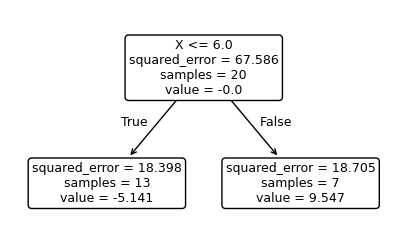

In [9]:
model3 = DecisionTreeRegressor(max_depth=1)
model3.fit(X, df["residual3"])
plt.figure(figsize=(5,3))
plot_tree(model2, feature_names=["X"], rounded=True, fontsize = 9)
plt.show()

## Step 8: Predict and Scale (Third Learner)

We make predictions with the third weak learner and scale them using the learning rate.

In [10]:
df["y_pred3"] = model3.predict(X)
df["y_pred3 x learning_rate"] = df["y_pred3"] * learning_rate

## Step 9: Final Boosted Prediction

We add the initial prediction and the scaled outputs from all three weak learners.

This gives us the final prediction from our manual boosting model.

In [11]:
df["y_pred_boosting"] = (
    df["initial_prediction"] +
    df["y_pred1 x learning_rate"] +
    df["y_pred2 x learning_rate"] +
    df["y_pred3 x learning_rate"]
)

## Step 10: Train scikit-learn GradientBoostingRegressor

We train scikit-learn's `GradientBoostingRegressor` using the same parameters:  
3 estimators, learning rate of 0.1, and decision stumps (`max_depth=1`).

This model will be used to compare against our manual boosting implementation.

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

X = df[["X"]]
y = df["Y"]

gbr_model = GradientBoostingRegressor(
    n_estimators=3,
    learning_rate=learning_rate,
    max_depth=1,
    random_state=42
)
gbr_model.fit(X, y)
df["y_pred_sklearn"] = gbr_model.predict(X)

## Step 11: Compare Results

We compare the predictions from our manual boosting model with scikit-learn's implementation.

If everything is correct, the difference should be close to zero for all rows.

In [13]:
df["difference"] = df["y_pred_boosting"] - df["y_pred_sklearn"]
df[["X", "Y", "y_pred_boosting", "y_pred_sklearn", "difference"]]

,X,Y,y_pred_boosting,y_pred_sklearn,difference
0,3.75,16.21,18.497259,18.497259,0.0
1,9.51,36.15,22.868793,22.868793,0.0
2,7.32,27.14,22.868793,22.868793,0.0
3,5.99,22.14,20.016459,20.016459,0.0
4,1.56,14.61,18.497259,18.497259,0.0
5,1.56,11.23,18.497259,18.497259,0.0
6,0.58,8.88,18.497259,18.497259,0.0
7,8.66,30.14,22.868793,22.868793,0.0
8,6.01,23.94,21.485268,21.485268,0.0
9,7.08,28.46,22.868793,22.868793,0.0


## Conclusion

In this notebook, we built a boosting model manually by combining three decision stumps step by step.

We used the same logic as scikit-learn’s `GradientBoostingRegressor`:  
starting from the mean of the target, training on residuals, and scaling predictions with a learning rate.

At the end, we compared our results with scikit-learn’s model and confirmed that both methods give the same predictions.

This shows that boosting is not magic. It’s a simple and logical idea:  
**learn from mistakes, step by step.**